In [4]:
import tensorflow as tf
import pandas as pd
import regex as re
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras import regularizers
import numpy as np

In [5]:
# Load the saved model
loaded_model = tf.keras.models.load_model("/Users/lubicasimkovicova/Desktop/Bachelorthesis---Sentiment-Analysis-with-Deep-Learning-main-2/model")

In [6]:
# import tweets from Clinton and Trump
df = pd.read_csv('/Users/lubicasimkovicova/Desktop/Bachelorthesis---Sentiment-Analysis-with-Deep-Learning-main-2/2016_us_election_tweets_100k.csv')

In [7]:
df.head()

,id,candidate_id,tweet_id,polarity,subjectivity,retweet_count,favorite_count,device,retweeted_status_id,lang,state,tweet_text,created_at,inserted_at,updated_at,tw_user_id,latitude,longitude
0,57486,3,770728672433143808,0.000000,0.000000,0,0,1,NaN,tr,NaN,"Ne farkınız var DAIŞ, El-Kaide, El Nusra, YPG ...",2016-08-30T21:03:29,2016-08-30T21:03:29,2016-08-30T21:03:29,NaN,NaN,NaN
1,57536,3,770729424207618048,0.000000,0.000000,0,0,1,NaN,en,NaN,@BarackObama the way you showed up in Louisian...,2016-08-30T21:06:28,2016-08-30T21:06:29,2016-08-30T21:06:29,NaN,NaN,NaN
2,57586,3,770730086978977796,-0.472222,0.555556,0,0,1,NaN,en,NaN,White house not taking tax avoid seriously! Ap...,2016-08-30T21:09:06,2016-08-30T21:09:07,2016-08-30T21:09:07,NaN,NaN,NaN
3,57632,2,770748036972773376,0.000000,0.000000,0,0,0,NaN,en,NaN,"politico: .realDonaldTrump, HillaryClinton ple...",2016-08-30T22:20:26,2016-08-30T22:20:26,2016-08-30T22:20:26,NaN,NaN,NaN
4,57682,1,770748065531723778,-0.125000,0.375000,0,0,5,NaN,en,NaN,She's over due by 250 days. https://t.co/IfOO9...,2016-08-30T22:20:33,2016-08-30T22:20:33,2016-08-30T22:20:33,NaN,NaN,NaN


In [8]:
df.shape

(100000, 18)

In [9]:
df.columns

Index(['id', 'candidate_id', 'tweet_id', 'polarity', 'subjectivity',
       'retweet_count', 'favorite_count', 'device', 'retweeted_status_id',
       'lang', 'state', 'tweet_text', 'created_at', 'inserted_at',
       'updated_at', 'tw_user_id', 'latitude', 'longitude'],
      dtype='object')

In [10]:
# get only text and candidate_id
df = df.drop(['id', 'tweet_id', 'polarity', 'subjectivity',
       'retweet_count', 'favorite_count', 'device', 'retweeted_status_id',
       'lang', 'state', 'inserted_at',
       'updated_at', 'tw_user_id', 'latitude', 'longitude'],axis=1)

In [11]:
df.head()

,candidate_id,tweet_text,created_at
0,3,"Ne farkınız var DAIŞ, El-Kaide, El Nusra, YPG ...",2016-08-30T21:03:29
1,3,@BarackObama the way you showed up in Louisian...,2016-08-30T21:06:28
2,3,White house not taking tax avoid seriously! Ap...,2016-08-30T21:09:06
3,2,"politico: .realDonaldTrump, HillaryClinton ple...",2016-08-30T22:20:26
4,1,She's over due by 250 days. https://t.co/IfOO9...,2016-08-30T22:20:33


In [12]:
df.created_at.unique()

array(['2016-08-30T21:03:29', '2016-08-30T21:06:28',
       '2016-08-30T21:09:06', ..., '2017-02-17T12:49:25',
       '2017-02-17T12:49:36', '2016-09-01T20:46:31'], dtype=object)

In [13]:
df3 = df

In [14]:
df.tail(20)

,candidate_id,tweet_text,created_at
99980,2,There was a time during the election where @Mo...,2017-02-17T14:11:41
99981,2,@MrsScottBaio @SpeakerRyan @realDonaldTrump 😂😂😂,2017-02-17T14:11:54
99982,2,@realDonaldTrump https://t.co/8EJvwsZ4u3,2017-02-17T14:11:59
99983,2,"@Breaking911 Well its a start , and with @real...",2016-09-01T18:54:02
99984,2,@realDonaldTrump @seanhannity Pls refuse to do...,2016-09-01T18:54:18
99985,2,@realDonaldTrump So thankful your are our Pre...,2017-02-17T12:47:17
99986,2,@IngrahamAngle @Morning_Joe @realDonaldTrump h...,2017-02-17T12:47:20
99987,2,@realDonaldTrump @liliantintori @marcorubio ht...,2017-02-17T12:47:24
99988,2,@realDonaldTrump you are an embarrassment. Lea...,2017-02-17T12:47:26
99989,2,Maybe he isn't so crazy. https://t.co/K7XId7cPcT,2017-02-17T12:47:37


In [15]:
# drop empty rows
df = df.dropna()

In [16]:
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) #remove mentions
    text = re.sub(r'#','', text) #remove hash
    text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
    text = re.sub('\s+', ' ', text) #remove new line char
    text = re.sub("\'", "", text) #remove single quotes
    
    return text

In [17]:
df["tweet_text"] = df["tweet_text"].apply(cleantext)

/var/folders/f3/mm9q96zs15z04wqzkzssq_k80000gn/T/ipykernel_3840/2994995719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet_text"] = df["tweet_text"].apply(cleantext)


In [18]:
df["tweet_text"].head(15)

0     Ne farkınız var DAIŞ, El-Kaide, El Nusra, YPG ...
1                the way you showed up in Louisiana ???
2     White house not taking tax avoid seriously! Ap...
3     politico: .realDonaldTrump, HillaryClinton ple...
4                           Shes over due by 250 days. 
5     Eight Jamaicans selected for ’s young leaders’...
7      can we just report the results after Election...
8     BarackObama Obama Obama commutes sentences for...
10                                      _ass_Bastard 😂😂
12                            Trumpsters are all fools.
13     "And I see your VOTES," sez HILLARY who only ...
17    Let me s*ck ur d1ldo 👏 😘 Look my top tweet :* ...
18    _Baldasaro I guess calling for the murder of h...
19                                    _ES _es _OEA2015 
20     _Comics you lie like a Democrat. He never ref...
Name: tweet_text, dtype: object

In [19]:
import string
df["tweet_text"] = df["tweet_text"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])

/var/folders/f3/mm9q96zs15z04wqzkzssq_k80000gn/T/ipykernel_3840/458263558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet_text"] = df["tweet_text"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])


In [20]:
df["tweet_text"] = df["tweet_text"].apply(lambda wrd: ''.join(wrd))

/var/folders/f3/mm9q96zs15z04wqzkzssq_k80000gn/T/ipykernel_3840/1643266762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet_text"] = df["tweet_text"].apply(lambda wrd: ''.join(wrd))


In [21]:
df["tweet_text"]

0        ne farkınız var daiş elkaide el nusra ypg ve p...
1                      the way you showed up in louisiana 
2        white house not taking tax avoid seriously app...
3        politico realdonaldtrump hillaryclinton pledge...
4                               shes over due by 250 days 
                               ...                        
99995                                                     
99996     at least hes on record denying all russian in...
99997                         youre not helping yourself 😂
99998                                                great
99999                          they are not out to get you
Name: tweet_text, Length: 55393, dtype: object

In [22]:
from nltk.corpus import stopwords

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lubicasimkovicova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
df["tweet_text"][:50] = df["tweet_text"][:50].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words("english")]))

/var/folders/f3/mm9q96zs15z04wqzkzssq_k80000gn/T/ipykernel_3840/3398030308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet_text"][:50] = df["tweet_text"][:50].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words("english")]))


In [25]:
df["tweet_text"]

0        ne farkınız var daiş elkaide el nusra ypg pkkd...
1                                     way showed louisiana
2        white house taking tax avoid seriously apple d...
3        politico realdonaldtrump hillaryclinton pledge...
4                                        shes due 250 days
                               ...                        
99995                                                     
99996     at least hes on record denying all russian in...
99997                         youre not helping yourself 😂
99998                                                great
99999                          they are not out to get you
Name: tweet_text, Length: 55393, dtype: object

In [26]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),     deacc=True))

In [27]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [28]:
temp = []
data_to_list = df["tweet_text"].values.tolist()
for i in range(len(data_to_list)):
    temp.append(data_to_list[i])
data_wordslem = list(sent_to_words(temp))

Using Lemmatizer instead of stemming. Lemmatizer is preffered over stemming. Lemmatizer find the root word whereas Stemmizer shorten the word. For Example, word 'Caring' -> Lemmatizer -> 'Care' WHEREAS 'Caring' -> Stemming -> 'Car'

In [29]:
import nltk
lemmatizer = nltk.stem.WordNetLemmatizer()

In [30]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/lubicasimkovicova/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lubicasimkovicova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
for i in range(len(data_wordslem)):
    for j in range(len(data_wordslem[i])):
        data_wordslem[i][j] = lemmatizer.lemmatize(data_wordslem[i][j],pos="v")

In [33]:
data = []
for i in range(len(data_wordslem)):
    data.append(detokenize(data_wordslem[i]))
print(data[:5])

['ne farkınız var dais elkaide el nusra ypg pkkdan hepsine silah veriyorsunuz', 'way show louisiana', 'white house take tax avoid seriously apple disgust appletax', 'politico realdonaldtrump hillaryclinton pledge pause campaign getty', 'shes due days']


In [34]:
print(data[:50])

['ne farkınız var dais elkaide el nusra ypg pkkdan hepsine silah veriyorsunuz', 'way show louisiana', 'white house take tax avoid seriously apple disgust appletax', 'politico realdonaldtrump hillaryclinton pledge pause campaign getty', 'shes due days', 'eight jamaicans select young leaders initiative jaminate', 'report result election day poll dont mean anything election corrupt liar', 'barackobama obama obama commute sentence federal prisoners president barac uniteblue tcot', 'assbastard', 'trumpsters fool', 'see vote sez hillary care money power andhillary', 'let sck ur ldo look top tweet wh re', 'baldasaro guess call murder upside', 'es es oea', 'comics lie like democrat never refuse need put rush irs', 'keep real', 'rt rocknkarma realdonaldtrump fit president congratulations clean bill health hillaryclinton hide', 'clinton trump sorry sorry', 'trumptrain', 'senate leaders job do join thousands remind via', 'get five buck trump tweet something stupid anway', 'dont', 'trump ideal sex

In [35]:
df.head()

,candidate_id,tweet_text,created_at
0,3,ne farkınız var daiş elkaide el nusra ypg pkkd...,2016-08-30T21:03:29
1,3,way showed louisiana,2016-08-30T21:06:28
2,3,white house taking tax avoid seriously apple d...,2016-08-30T21:09:06
3,2,politico realdonaldtrump hillaryclinton pledge...,2016-08-30T22:20:26
4,1,shes due 250 days,2016-08-30T22:20:33


In [36]:
# add new cleaned column to dataframe
df["data"] = data
df

/var/folders/f3/mm9q96zs15z04wqzkzssq_k80000gn/T/ipykernel_3840/3539159861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["data"] = data


,candidate_id,tweet_text,created_at,data
0,3,ne farkınız var daiş elkaide el nusra ypg pkkd...,2016-08-30T21:03:29,ne farkınız var dais elkaide el nusra ypg pkkd...
1,3,way showed louisiana,2016-08-30T21:06:28,way show louisiana
2,3,white house taking tax avoid seriously apple d...,2016-08-30T21:09:06,white house take tax avoid seriously apple dis...
3,2,politico realdonaldtrump hillaryclinton pledge...,2016-08-30T22:20:26,politico realdonaldtrump hillaryclinton pledge...
4,1,shes due 250 days,2016-08-30T22:20:33,shes due days
...,...,...,...,...
99995,2,,2016-09-01T20:46:31,
99996,2,at least hes on record denying all russian in...,2017-02-17T12:48:13,at least hes on record deny all russian involv...
99997,2,youre not helping yourself 😂,2017-02-17T12:48:23,youre not help yourself
99998,2,great,2017-02-17T12:48:29,great


In [37]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...    0 2068  237]
 [   0    0    0 ...  144  123 1621]
 [   0    0    0 ...  625 1823  737]
 ...
 [   0    0    0 ...   16  131  308]
 [   0    0    0 ...    0    0   77]
 [   0    0    0 ...    3   22    4]]


In [38]:
df.shape

(55393, 4)

In [39]:
sentiment = ['Neutral','Negative','Positive']

In [40]:
sequence = tokenizer.texts_to_sequences(['I go to gym daily'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(loaded_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 259ms/step


'Positive'

In [41]:
def sentiment_analysis2(data):
    sentiment_storage = []
    for d in data:
        sequence = tokenizer.texts_to_sequences([d])        
        test = pad_sequences(sequence, maxlen=max_len)
        prediction = loaded_model.predict(test, verbose=0)
        sentiment_label = sentiment[np.argmax(prediction)]
        sentiment_storage.append(sentiment_label)

    return sentiment_storage

In [42]:
# filter by candidates - select only Donald Trump and Hillary Clinton

# Hillary Clinton
HC = df[df["candidate_id"] == 1]

# Donald Trump
DT = df[df["candidate_id"] == 2]

In [43]:
DT.head(15)

,candidate_id,tweet_text,created_at,data
3,2,politico realdonaldtrump hillaryclinton pledge...,2016-08-30T22:20:26,politico realdonaldtrump hillaryclinton pledge...
10,2,assbastard 😂😂,2016-08-30T22:21:22,assbastard
12,2,trumpsters fools,2016-08-30T22:21:41,trumpsters fool
17,2,let sck ur d1ldo 👏 😘 look top tweet wh0re,2016-08-30T22:22:23,let sck ur ldo look top tweet wh re
20,2,comics lie like democrat never refused need pu...,2016-08-30T22:22:46,comics lie like democrat never refuse need put...
24,2,035 keeps real,2016-08-30T22:23:20,keep real
26,2,clinton trump sorry sorry,2016-08-30T22:23:34,clinton trump sorry sorry
28,2,werenotgonnatakeitanymore trumptrain makeameri...,2016-08-30T22:23:47,trumptrain
30,2,got five bucks trump tweets something stupid a...,2016-08-30T22:23:59,get five buck trump tweet something stupid anway
46,2,trumps ideal sex slave,2016-08-30T22:20:33,trump ideal sex slave


In [44]:
HC.shape

(14290, 4)

In [45]:
DT.shape

(36712, 4)

In [46]:
HC.head(10)

,candidate_id,tweet_text,created_at,data
4,1,shes due 250 days,2016-08-30T22:20:33,shes due days
7,1,report results election day polls dont mean an...,2016-08-30T22:20:58,report result election day poll dont mean anyt...
13,1,see votes sez hillary cares money power andhil...,2016-08-30T22:21:49,see vote sez hillary care money power andhillary
18,1,baldasaro guess calling murder upside 😬,2016-08-30T22:22:31,baldasaro guess call murder upside
25,1,rt rocknkarma realdonaldtrump fit president co...,2016-08-30T22:23:27,rt rocknkarma realdonaldtrump fit president co...
52,1,love x 1k,2016-08-30T22:21:22,love
54,1,surrogate apology 4 tweetg cartoon clinton bla...,2016-08-30T22:21:41,surrogate apology tweetg cartoon clinton black...
56,1,prolife,2016-08-30T22:21:58,prolife
58,1,old man better take note wc felds find loophol...,2016-08-30T22:22:12,old man better take note wc felds find loophol...
62,1,say whaaaaat,2016-08-30T22:22:46,say whaaaaat


In [47]:
# This took a very long time (45min - 1hr). It predicted the sentiment of each
# of the approximately 6600 Twitter posts.

#predicted_sentiment_hillary = sentiment_analysis2(HC["data"])

In [48]:
#HC.loc[:, "predicted_hillary"] = predicted_sentiment_hillary

/var/folders/f3/mm9q96zs15z04wqzkzssq_k80000gn/T/ipykernel_3840/2838040925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HC.loc[:, "predicted_hillary"] = predicted_sentiment_hillary


In [49]:
HC.head()

,candidate_id,tweet_text,created_at,data,predicted_hillary
4,1,shes due 250 days,2016-08-30T22:20:33,shes due days,Negative
7,1,report results election day polls dont mean an...,2016-08-30T22:20:58,report result election day poll dont mean anyt...,Neutral
13,1,see votes sez hillary cares money power andhil...,2016-08-30T22:21:49,see vote sez hillary care money power andhillary,Positive
18,1,baldasaro guess calling murder upside 😬,2016-08-30T22:22:31,baldasaro guess call murder upside,Negative
25,1,rt rocknkarma realdonaldtrump fit president co...,2016-08-30T22:23:27,rt rocknkarma realdonaldtrump fit president co...,Neutral


In [50]:
predicted_sentiment_trump = sentiment_analysis2(DT["data"][:1000])

In [51]:
predicted_sentiment_trump2 = sentiment_analysis2(DT["data"][1000:2000])

In [52]:
predicted_sentiment_trump3 = sentiment_analysis2(DT["data"][2000:3000])

In [54]:
predicted_sentiment_trump4 = sentiment_analysis2(DT["data"][3000:4000])

In [55]:
predicted_sentiment_trump5 = sentiment_analysis2(DT["data"][4000:6000])

In [56]:
predicted_sentiment_trump6 = sentiment_analysis2(DT["data"][6000:8000])

In [57]:
predicted_sentiment_trump7 = sentiment_analysis2(DT["data"][8000:10000])

In [58]:
predicted_sentiment_trump8 = sentiment_analysis2(DT["data"][10000:12000])

In [59]:
predicted_sentiment_trump14 = sentiment_analysis2(DT["data"][12000:14000])

In [60]:
predicted_sentiment_trump9 = sentiment_analysis2(DT["data"][14000:16000])

In [61]:
predicted_sentiment_trump10 = sentiment_analysis2(DT["data"][16000:18000])

In [62]:
predicted_sentiment_trump11 = sentiment_analysis2(DT["data"][18000:20000])

In [63]:
predicted_sentiment_trump12 = sentiment_analysis2(DT["data"][20000:22000])

In [64]:
predicted_sentiment_trump13 = sentiment_analysis2(DT["data"][22000:])

In [65]:
# adding all columns together - the order here matters and yes, it should be as following - _+1+2+3+4+5+6+7+8+14+9+10+11+12+13
DT["combined_sentiment_trump"] = predicted_sentiment_trump + predicted_sentiment_trump2 + predicted_sentiment_trump3 +predicted_sentiment_trump4 + predicted_sentiment_trump5 + predicted_sentiment_trump6 + predicted_sentiment_trump7 + predicted_sentiment_trump8 + predicted_sentiment_trump14+ predicted_sentiment_trump9 + predicted_sentiment_trump10 + predicted_sentiment_trump11 + predicted_sentiment_trump12 + predicted_sentiment_trump13

/var/folders/f3/mm9q96zs15z04wqzkzssq_k80000gn/T/ipykernel_3840/691664907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DT["combined_sentiment_trump"] = predicted_sentiment_trump + predicted_sentiment_trump2 + predicted_sentiment_trump3 +predicted_sentiment_trump4 + predicted_sentiment_trump5 + predicted_sentiment_trump6 + predicted_sentiment_trump7 + predicted_sentiment_trump8 + predicted_sentiment_trump14+ predicted_sentiment_trump9 + predicted_sentiment_trump10 + predicted_sentiment_trump11 + predicted_sentiment_trump12 + predicted_sentiment_trump13


# Visualize the results

In [147]:
# group by each candidate and each sentiment
hillary_negative_sentiment = HC[(HC["predicted_hillary"] == "Negative") & (HC["created_at"] <= '2016-11-08')]
hillary_positive_sentiment = HC[(HC["predicted_hillary"] == "Positive") & (HC["created_at"] <= '2016-11-08')]
hillary_neutral_sentiment = HC[(HC["predicted_hillary"] == "Neutral") & (HC["created_at"] <= '2016-11-08')]
trump_negative_sentiment = DT[(DT["combined_sentiment_trump"] == "Negative") & (DT["created_at"] <= '2016-11-08')]
trump_positive_sentiment = DT[(DT["combined_sentiment_trump"] == "Positive") & (DT["created_at"] <= '2016-11-08')]
trump_neutral_sentiment = DT[(DT["combined_sentiment_trump"] == "Neutral") & (DT["created_at"] <= '2016-11-08')]

In [148]:
hillary_positive_sentiment.head()

,candidate_id,tweet_text,created_at,data,predicted_hillary
13,1,see votes sez hillary cares money power andhil...,2016-08-30T22:21:49,see vote sez hillary care money power andhillary,Positive
68,1,nra teaparty congress lol,2016-08-30T22:23:34,nra teaparty congress lol,Positive
98,1,unreal omg rapeculture simply cannot believe s...,2016-08-30T22:21:06,unreal omg rapeculture simply cannot believe s...,Positive
127,1,dont give in,2016-08-30T20:50:46,dont give in,Positive
339,1,needs it badly,2016-08-30T22:23:54,need it badly,Positive


In [149]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Polarity of posts of each candidate using a stronger model with trained on 80 epochs')

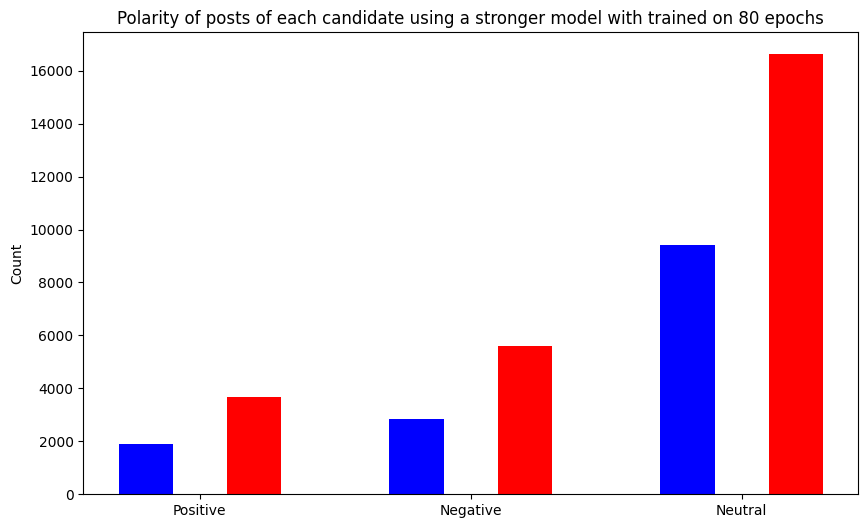

In [144]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for Hillary Clinton
bar_width = 0.2
bar_positions_hillary = range(1, 4)
ax.bar([p - bar_width for p in bar_positions_hillary], [len(hillary_positive_sentiment), len(hillary_negative_sentiment), len(hillary_neutral_sentiment)], width=bar_width, label='Hillary Clinton', color='blue')

# Plotting bars for Donald Trump
bar_positions_trump = range(1, 4)
ax.bar([p + bar_width for p in bar_positions_trump], [len(trump_positive_sentiment), len(trump_negative_sentiment), len(trump_neutral_sentiment)], width=bar_width, label='Donald Trump', color='red')

# Set labels and title
ax.set_xticks([p for p in bar_positions_hillary])
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'])
ax.set_ylabel('Count')
ax.set_title('Polarity of posts of each candidate using a stronger model with trained on 80 epochs')

In [145]:
HC.shape

(14290, 5)

In [146]:
DT.shape

(36712, 5)

### Because Trump's dataset is larger by more than 22000 posts in this case, it makes sense to see more data points, or higher bars, in each of Trump's categories.

### Now let's create a checkpoint, save the data to a new variable and then randomly delete 22000 rows in order to equalize the dataset and get more realistic results.

In [113]:
# saving the data to a new variable
DT2 = DT

In [114]:
HC2 = HC

In [115]:
# deleting random rows in order to achieve the same size of datasets

# Set a seed for reproducibility
np.random.seed(42)

# Specify the number of rows to delete
num_rows_to_delete = 22422

# Check if the DataFrame has enough rows to delete
if num_rows_to_delete > len(DT2):
    print("Error: The number of rows to delete exceeds the total number of rows in the DataFrame.")
else:
    # Randomly select rows to delete
    rows_to_delete = DT2.sample(n=num_rows_to_delete).index

    # Drop the selected rows
    DT2 = DT2.drop(index=rows_to_delete)

    # Display the resulting DataFrame
    print(DT2)

       candidate_id                                         tweet_text  \
10                2                                      assbastard 😂😂   
12                2                                   trumpsters fools   
46                2                             trumps ideal sex slave   
51                2                trumps asshole taste like must love   
59                2                                              wrong   
...             ...                                                ...   
99988             2   you are an embarrassment learn a few more voc...   
99990             2   you say he is unelectable after he is elected...   
99991             2   you are a horrible leader but an excellent co...   
99993             2   what caused this great commotion motion motio...   
99997             2                       youre not helping yourself 😂   

                created_at                                               data  \
10     2016-08-30T22:21:22    

In [116]:
# there are still some space values - this drops the rows
DT2 = DT2.dropna(subset=['data'])

In [117]:
DT2.shape

(14290, 5)

In [118]:
# group for Trump
# group by positive, negative and neutral
positive_DT = DT2[DT2['combined_sentiment_trump'] == 'Positive']
negative_DT = DT2[DT2['combined_sentiment_trump'] == 'Negative']
neutral_DT = DT2[DT2['combined_sentiment_trump'] == 'Neutral']

# group by created_at and calculate the count for each time point. The .sum() needs to be added as well,
# because some posts were posted at the same time second and count for 2.
positive_counts_DT = positive_DT.groupby('created_at').size().sum()
neutral_counts_DT = neutral_DT.groupby('created_at').size().sum()
negative_counts_DT = negative_DT.groupby('created_at').size().sum()

positive_DT.head()

,candidate_id,tweet_text,created_at,data,combined_sentiment_trump
173,2,pence trump on migrants ‘we don’t want them’,2016-08-30T20:50:46,pence trump on migrants we don want them,Positive
184,2,go trump,2016-08-30T22:20:42,go trump,Positive
228,2,biafravengennamdikanu commission,2016-08-30T22:20:51,commission,Positive
330,2,tweets1959,2016-08-30T22:22:48,tweet,Positive
337,2,lets makehillarybrokeagain join,2016-08-30T22:23:43,let join,Positive


In [119]:
# group for Hillary
# group by positive, negative and neutral
positive_HC = HC2[HC2['predicted_hillary'] == 'Positive']
negative_HC = HC2[HC2['predicted_hillary'] == 'Negative']
neutral_HC = HC2[HC2['predicted_hillary'] == 'Neutral']

# group by created_at and calculate the count for each time point. The .sum() needs to be added as well,
# because some posts were posted at the same time second and count for 2.
positive_counts_HC = positive_HC.groupby('created_at').size().sum()
neutral_counts_HC = neutral_HC.groupby('created_at').size().sum()
negative_counts_HC = negative_HC.groupby('created_at').size().sum()

In [120]:
### visualise posts related to each candidate and their positivity

Text(0.5, 1.0, 'Polarity of posts of each candidate')

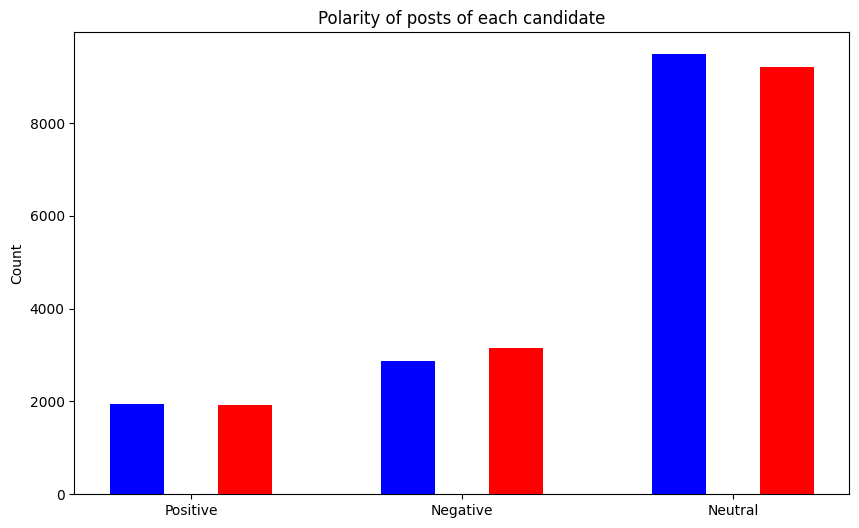

In [121]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for Hillary Clinton
bar_width = 0.2
bar_positions_hillary = range(1, 4)
ax.bar([p - bar_width for p in bar_positions_hillary], [positive_counts_HC, negative_counts_HC, neutral_counts_HC], width=bar_width, label='Hillary Clinton', color='blue')

# Plotting bars for Donald Trump
bar_positions_trump = range(1, 4)
ax.bar([p + bar_width for p in bar_positions_trump], [positive_counts_DT, negative_counts_DT, neutral_counts_DT], width=bar_width, label='Donald Trump', color='red')

# Set labels and title
ax.set_xticks([p for p in bar_positions_hillary])
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'])
ax.set_ylabel('Count')
ax.set_title('Polarity of posts of each candidate')

### Now let's try a comparison of results from February 2017, after the election.

In [122]:
# group by each candidate and each sentiment - taking only the dates after the election
hillary_negative_sentiment = HC[(HC["predicted_hillary"] == "Negative") & (HC["created_at"] > '2016-11-08')]
hillary_positive_sentiment = HC[(HC["predicted_hillary"] == "Positive") & (HC["created_at"] > '2016-11-08')]
hillary_neutral_sentiment = HC[(HC["predicted_hillary"] == "Neutral") & (HC["created_at"] > '2016-11-08')]
trump_negative_sentiment = DT[(DT["combined_sentiment_trump"] == "Negative") & (DT["created_at"] > '2016-11-08')]
trump_positive_sentiment = DT[(DT["combined_sentiment_trump"] == "Positive") & (DT["created_at"] > '2016-11-08')]
trump_neutral_sentiment = DT[(DT["combined_sentiment_trump"] == "Neutral") & (DT["created_at"] > '2016-11-08')]

In [123]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Polarity of posts of each candidate using a stronger model with trained on 80 epochs')

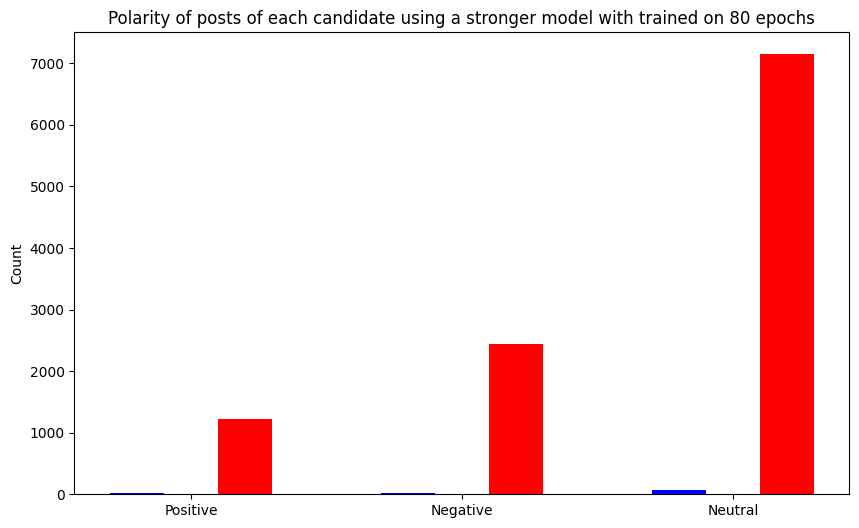

In [127]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for Hillary Clinton
bar_width = 0.2
bar_positions_hillary = range(1, 4)
ax.bar([p - bar_width for p in bar_positions_hillary], [len(hillary_positive_sentiment), len(hillary_negative_sentiment), len(hillary_neutral_sentiment)], width=bar_width, label='Hillary Clinton', color='blue')

# Plotting bars for Donald Trump
bar_positions_trump = range(1, 4)
ax.bar([p + bar_width for p in bar_positions_trump], [len(trump_positive_sentiment), len(trump_negative_sentiment), len(trump_neutral_sentiment)], width=bar_width, label='Donald Trump', color='red')

# Set labels and title
ax.set_xticks([p for p in bar_positions_hillary])
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'])
ax.set_ylabel('Count')
ax.set_title('Polarity of posts of each candidate using a stronger model with trained on 80 epochs')

### Because Trump's dataset is larger by more than 22000 posts in this case, it makes sense to see more data points, or higher bars, in each of Trump's categories.

### Now let's create a checkpoint, save the data to a new variable and then randomly delete 22000 rows in order to equalize the dataset and get more realistic results.

In [130]:
# saving the data to a new variable
DT2 = DT

In [131]:
HC2 = HC

In [132]:
# deleting random rows in order to achieve the same size of datasets

# Set a seed for reproducibility
np.random.seed(42)

# Specify the number of rows to delete
num_rows_to_delete = 22422

# Check if the DataFrame has enough rows to delete
if num_rows_to_delete > len(DT2):
    print("Error: The number of rows to delete exceeds the total number of rows in the DataFrame.")
else:
    # Randomly select rows to delete
    rows_to_delete = DT2.sample(n=num_rows_to_delete).index

    # Drop the selected rows
    DT2 = DT2.drop(index=rows_to_delete)

    # Display the resulting DataFrame
    print(DT2)

       candidate_id                                         tweet_text  \
10                2                                      assbastard 😂😂   
12                2                                   trumpsters fools   
46                2                             trumps ideal sex slave   
51                2                trumps asshole taste like must love   
59                2                                              wrong   
...             ...                                                ...   
99988             2   you are an embarrassment learn a few more voc...   
99990             2   you say he is unelectable after he is elected...   
99991             2   you are a horrible leader but an excellent co...   
99993             2   what caused this great commotion motion motio...   
99997             2                       youre not helping yourself 😂   

                created_at                                               data  \
10     2016-08-30T22:21:22    

In [133]:
# there are still some space values - this drops the rows
DT2 = DT2.dropna(subset=['data'])

In [134]:
DT2.shape

(14290, 5)

In [153]:
hillary_negative_sentiment = HC[(HC["predicted_hillary"] == "Negative"]) & (HC["created_at"] > '2016-11-08')]
hillary_positive_sentiment = HC[(HC["predicted_hillary"] == "Positive"]) & (HC["created_at"] > '2016-11-08')]
hillary_neutral_sentiment = HC[(HC["predicted_hillary"] == "Neutral"]) & (HC["created_at"] > '2016-11-08')]
trump_negative_sentiment = DT[(DT["combined_sentiment_trump"] == "Negative"]) & (DT["created_at"] > '2016-11-08')]
trump_positive_sentiment = DT[(DT["combined_sentiment_trump"] == "Positive"]) & (DT["created_at"] > '2016-11-08')]
trump_neutral_sentiment = DT[(DT["combined_sentiment_trump"] == "Neutral"]) & (DT["created_at"] > '2016-11-08')]

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1570439597.py, line 1)

In [156]:
# group for Trump
# group by positive, negative and neutral
positive_DT = DT2[(DT2['combined_sentiment_trump'] == 'Positive') & (DT["created_at"] > '2016-11-08')]
negative_DT = DT2[(DT2['combined_sentiment_trump'] == 'Negative') & (DT["created_at"] > '2016-11-08')]
neutral_DT = DT2[(DT2['combined_sentiment_trump'] == 'Neutral') & (DT["created_at"] > '2016-11-08')]

# group by created_at and calculate the count for each time point. The .sum() needs to be added as well,
# because some posts were posted at the same time second and count for 2.
positive_counts_DT = positive_DT.groupby('created_at').size().sum()
neutral_counts_DT = neutral_DT.groupby('created_at').size().sum()
negative_counts_DT = negative_DT.groupby('created_at').size().sum()

positive_DT.head()

/var/folders/f3/mm9q96zs15z04wqzkzssq_k80000gn/T/ipykernel_3840/1305964786.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  positive_DT = DT2[(DT2['combined_sentiment_trump'] == 'Positive') & (DT["created_at"] > '2016-11-08')]
/var/folders/f3/mm9q96zs15z04wqzkzssq_k80000gn/T/ipykernel_3840/1305964786.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  negative_DT = DT2[(DT2['combined_sentiment_trump'] == 'Negative') & (DT["created_at"] > '2016-11-08')]
/var/folders/f3/mm9q96zs15z04wqzkzssq_k80000gn/T/ipykernel_3840/1305964786.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neutral_DT = DT2[(DT2['combined_sentiment_trump'] == 'Neutral') & (DT["created_at"] > '2016-11-08')]


,candidate_id,tweet_text,created_at,data,combined_sentiment_trump
729,2,lol,2017-02-17T11:45:50,lol,Positive
731,2,stop deligitimizing the media the only one th...,2017-02-17T11:46:01,stop deligitimizing the media the only one tha...,Positive
774,2,hello d timmy timdog2012,2017-02-17T11:46:17,hello timmy timdog,Positive
816,2,amen,2017-02-17T11:46:18,amen,Positive
890,2,u real need to find somewhere to go to cuz tr...,2017-02-17T11:45:54,real need to find somewhere to go to cuz trump...,Positive


In [159]:
# group for Hillary
# group by positive, negative and neutral
positive_HC = HC2[(HC2['predicted_hillary'] == 'Positive') & (DT["created_at"] > '2016-11-08')]
negative_HC = HC2[(HC2['predicted_hillary'] == 'Negative') & (DT["created_at"] > '2016-11-08')]
neutral_HC = HC2[(HC2['predicted_hillary'] == 'Neutral') & (DT["created_at"] > '2016-11-08')]

# group by created_at and calculate the count for each time point. The .sum() needs to be added as well,
# because some posts were posted at the same time second and count for 2.
positive_counts_HC = positive_HC.groupby('created_at').size().sum()
neutral_counts_HC = neutral_HC.groupby('created_at').size().sum()
negative_counts_HC = negative_HC.groupby('created_at').size().sum()

/var/folders/f3/mm9q96zs15z04wqzkzssq_k80000gn/T/ipykernel_3840/3906462705.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  positive_HC = HC2[(HC2['predicted_hillary'] == 'Positive') & (DT["created_at"] > '2016-11-08')]
/var/folders/f3/mm9q96zs15z04wqzkzssq_k80000gn/T/ipykernel_3840/3906462705.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  negative_HC = HC2[(HC2['predicted_hillary'] == 'Negative') & (DT["created_at"] > '2016-11-08')]
/var/folders/f3/mm9q96zs15z04wqzkzssq_k80000gn/T/ipykernel_3840/3906462705.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neutral_HC = HC2[(HC2['predicted_hillary'] == 'Neutral') & (DT["created_at"] > '2016-11-08')]


In [165]:
negative_HC.head()

,candidate_id,tweet_text,created_at,data,predicted_hillary


In [160]:
neutral_counts_HC

0

In [161]:
### visualise posts related to each candidate and their positivity

Text(0.5, 1.0, 'Polarity of posts of each candidate')

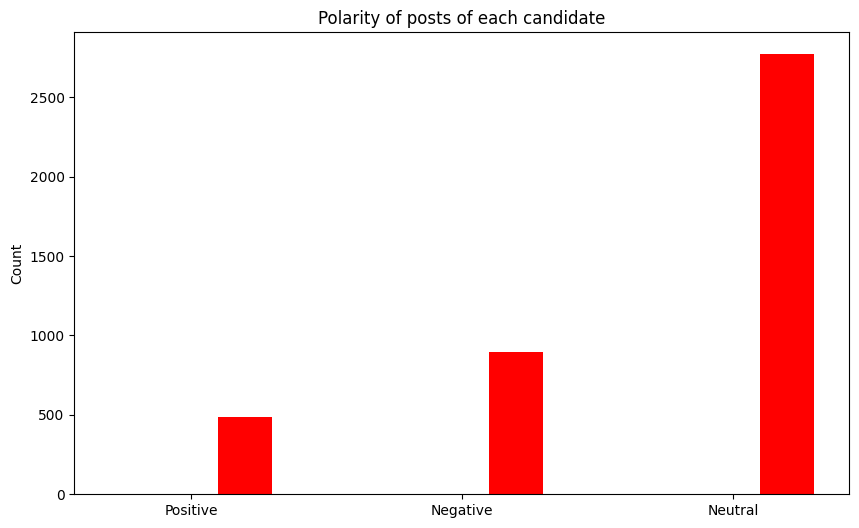

In [162]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for Hillary Clinton
bar_width = 0.2
bar_positions_hillary = range(1, 4)
ax.bar([p - bar_width for p in bar_positions_hillary], [positive_counts_HC, negative_counts_HC, neutral_counts_HC], width=bar_width, label='Hillary Clinton', color='blue')

# Plotting bars for Donald Trump
bar_positions_trump = range(1, 4)
ax.bar([p + bar_width for p in bar_positions_trump], [positive_counts_DT, negative_counts_DT, neutral_counts_DT], width=bar_width, label='Donald Trump', color='red')

# Set labels and title
ax.set_xticks([p for p in bar_positions_hillary])
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'])
ax.set_ylabel('Count')
ax.set_title('Polarity of posts of each candidate')

### Becuause of lack of data in this dataset, it is difficult to make a conclusion, whether the sentiment has changed after the election results.